# Name : Shashwat Singh Bhadoriya
# HRC UID : H2H11362K
Final Project

# MILESTONE : 01 --> DATA SANITY

IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd 
import numpy as np

IMPORTING THE CSV DATA FILE 


In [2]:
df = pd.read_csv('Final.csv')

CHECK THE DESCRIPTION OF THE DATAFRAME

In [3]:
df.describe()

,CUSTOMER_ORDER_ID,SALES_ORG,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,REQUESTED_DELIVERY_DATE,CREDIT_STATUS,CUSTOMER_NUMBER
count,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,219478.000000,1.101925e+06
mean,8.763187e+08,3.304891e+03,3.431364e+03,2.022032e+07,1.340316e+05,8.763265e+08,2.022035e+07,74.464771,1.074092e+09
std,7.088594e+07,6.958920e+02,5.483805e+02,1.426756e+02,6.503618e+04,7.090306e+07,1.751912e+03,14.444210,4.042693e+08
min,7.534520e+08,2.100000e+03,5.900000e+01,2.022010e+07,0.000000e+00,7.534518e+08,2.019081e+07,52.000000,1.210001e+07
25%,8.149522e+08,2.702000e+03,3.260000e+03,2.022021e+07,8.170200e+04,8.148366e+08,2.022022e+07,64.000000,1.230006e+09
50%,8.763963e+08,3.305000e+03,3.660000e+03,2.022032e+07,1.509540e+05,8.763542e+08,2.022033e+07,64.000000,1.230014e+09
75%,9.376832e+08,3.908000e+03,3.670000e+03,2.022042e+07,1.853580e+05,9.377293e+08,2.022050e+07,93.000000,1.230014e+09
max,9.990063e+08,4.510000e+03,4.260000e+03,2.022060e+07,2.359590e+05,9.990075e+08,2.202022e+07,93.000000,1.230025e+09


CHECK THE SHAPE OF THE DATAFRAME

In [4]:
df.shape

(1101925, 16)

CHECK THE DATAFRAME INFORMATION

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

CHECK FOR THE NULL VALUES IN THE DATAFRAME 

In [6]:
print(df.isnull().sum())

CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE         18692
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CREDIT_STATUS              882447
CUSTOMER_NUMBER                 0
dtype: int64


REPLACING ALL THE NULL VALUES WITH "NaN"
- The below code replaces all the 'None' and empty strings in the dataframe with NaN values
- inplace= true ensures that the changes are made directly to the original dataframe

In [7]:
df.fillna('NaN', inplace=True)

Change the format of date columns - "ORDER_CREATION_DATE" to datetime[64] with the format as "%Y%m%d"
- Using the to_datetime function to convert the format of the date present in ORDER_CREATOIN_DATE coloumn

In [8]:
df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'], format="%Y%m%d")

Do the same activity for the other date field i.e. "REQUESTED_DELIVERY_DATE" to datetime[64] with the format as "%Y%m%d"
- Using the to_datetime function to convert the format of the date present in REQUESTED_DELIVERY_DATE coloumn

In [9]:
df['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(df['REQUESTED_DELIVERY_DATE'], format="%Y%m%d")

Sanity check - Check how many records are having order date greater than the delivery date
- This is a sanity check as the ORDER_CREATION_DATE cannot be greater than REQUESTED_DELIVERY_DATE

In [10]:
print((df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE']).sum())

27142


Remove those records where order date is greater than the delivery date
- updating the dataframe by taking the rows in which ORDER_CREATION_DATE<=REQUESTED_DELIVERY_DATE by this we remove the rows in which order date is greater than delievery date

In [11]:
df = df[df['ORDER_CREATION_DATE'] <= df['REQUESTED_DELIVERY_DATE']]

Check the number of records where the “ORDER_AMOUNT” field is having "-" in it.
- using str.contains to find out the values that has '-' in ORDER_AMOUNT coloumn

In [12]:
print((df['ORDER_AMOUNT'].str.contains('-').sum()))

32


Replace "-" with "" from the “ORDER_AMOUNT” field.
- coverting the ORDER_AMOUNT to string format then replacing the ' - ' with ''

In [13]:
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].astype(str).str.replace('-', '')

Check the number of records where the “ORDER_AMOUNT” field is having “,” in it.
- Again using str.contains we are finding the total number of values that has ','in ORDER_AMOUNT

In [14]:
count = df['ORDER_AMOUNT'].str.contains(",", na=False).sum()
count

1073406

Replace “,” with “.” from the “ORDER_AMOUNT” field. 
- again converting the ORDER_AMOUNT in string format and replacing ',' with '.'
- Then converting the ORDER_AMOUNT to float value using to_numeric function
- 'coerce' means non numeric values will be replaced with NaN values 

In [15]:
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].astype(str).str.replace(',', '.')
df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce')
# convert string to numeric
print(df['ORDER_AMOUNT'])

0            954.61
1            787.36
2          67493.46
3           1405.54
4              0.00
             ...   
1101920     4415.19
1101921        0.00
1101922        0.00
1101923        0.00
1101924     4415.19
Name: ORDER_AMOUNT, Length: 1074783, dtype: float64


Count the number of records where the order date and the delivery date are same
- To do this we used dt.date to acess the date part and then we compared them to find out if they are equal or not

In [16]:
count = (df['ORDER_CREATION_DATE'] == df['REQUESTED_DELIVERY_DATE']).sum()
count

100437

Count the number of records for each currency type by using the field “'ORDER_CURRENCY'”
- To count the number of records for each currency type using the "ORDER_CURRENCY" field, we can use the 
  value_counts() function. This will show us how many categories are present in the ORDER_CURRENCY column and the total number of occurrences for each category

In [17]:
currency_counts = df['ORDER_CURRENCY'].value_counts()
currency_counts

USD    622835
EUR    253196
AUD     64200
CAD     55065
GBP     22028
MYR     13946
PLN     11861
AED      7852
HKD      6198
CHF      5259
RON      4731
SGD      3909
CZK      2178
HU1      1377
NZD        79
BHD        32
SAR        14
QAR        12
KWD         7
SEK         4
Name: ORDER_CURRENCY, dtype: int64

Create a new column in the existing dataframe as “'amount_in_usd'” and convert all the non-USD currencies in USD and store them in the same column. 

Creating a Dictionary that has all the currencies's conversion rate

In [18]:
df['ORDER_CURRENCY'] = df['ORDER_CURRENCY'].str.replace("HU1","HUF")

In [19]:
url = 'https://open.er-api.com/v6/latest/USD'
conversion_rate = pd.read_json(url)
rates = conversion_rate['rates']
print("The current conversion rates to usd are : ")
rates

The current conversion rates to usd are : 


AED       3.672500
AFN      87.147380
ALL     102.455439
AMD     386.701612
ANG       1.790000
          ...     
XPF     111.099244
YER     250.230501
ZAR      19.643770
ZMW      19.560685
ZWL    2632.262848
Name: rates, Length: 162, dtype: float64

converting order amount to numeric and converting every amount in USD
- we are creating a new coloumn that has order amount in USD only 
- we created a Lambda function that takes the row of the dataframe as input and multiples the amount in ORDER_AMOUNT coloumn with the conversion rates present in the dictionary which is indexed by ORDER_CURRENCY
- if the currency is not present in the dictionary it returns NaN instead
- axis=1 specifies that lambda function must be applied to each row   

In [20]:
def convert_to_usd(currency,amount):
    return (float(rates[currency]) * float(amount))
df ['amount_in_usd'] = df.apply(lambda row: convert_to_usd(row['ORDER_CURRENCY'], row['ORDER_AMOUNT']), axis=1)
print("Updated Dataframe is : " )
df['amount_in_usd']

Updated Dataframe is : 


0            889.237353
1            733.440800
2          62871.440366
3           1309.287215
4              0.000000
               ...     
1101920     5955.698358
1101921        0.000000
1101922        0.000000
1101923        0.000000
1101924     5955.698358
Name: amount_in_usd, Length: 1074783, dtype: float64

 Check for values “0” in the “'amount_in_usd” column. 

In [21]:
print((df['amount_in_usd']=='0').sum())

0


Create a new column in the existing dataframe “unique_cust_id” by adding 'CUSTOMER_NUMBER' and 'COMPANY_CODE'
- converting the CUSTOMER_NUMBER to string and COMPANY_CODE to string and then concatenating them to get a unique customer ID



In [22]:
df['UNIQUE_CUST_ID'] = df['CUSTOMER_NUMBER'].astype(str) + df['COMPANY_CODE'].astype(str)
print(df)

         CUSTOMER_ORDER_ID  SALES_ORG      DISTRIBUTION_CHANNEL      DIVISION  \
0                946851639       3537  United States of America  South-Region   
1                963432061       3449                Martinique  South-Region   
2                971991639       3238                   Moldova  South-Region   
3                754349803       3911      United Arab Emirates  South-Region   
4                930253442       2381                    Greece  South-Region   
...                    ...        ...                       ...           ...   
1101920          853605710       2498                   Germany  South-Region   
1101921          998890898       4509                   Armenia  South-Region   
1101922          983330221       3951                     Nepal  South-Region   
1101923          926668029       3235                    Panama  South-Region   
1101924          921701000       2968                 Nicaragua  South-Region   

        RELEASED_CREDIT_VAL

In [23]:
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,UNIQUE_CUST_ID
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807,889.237353,123118073220
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807,733.440800,123118073220
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758,62871.440366,121187583260
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770,1309.287215,12104997703290
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400,0.000000,12103514003290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,Germany,South-Region,"0,00",NaN,4260,2022-06-01,74357,NR02,946056501,4415.19,2022-06-01,SGD,NaN,1210331804,5955.698358,12103318044260
1101921,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,2022-06-01,84052,NR04,894775488,0.00,2022-06-01,SGD,NaN,1210331804,0.000000,12103318044260
1101922,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,2022-06-01,85322,NR01,909729781,0.00,2022-06-01,SGD,NaN,1210331811,0.000000,12103318114260
1101923,926668029,3235,Panama,South-Region,"0,00",NaN,4260,2022-06-01,90538,SR04,940836817,0.00,2022-06-01,SGD,NaN,1210331811,0.000000,12103318114260


Export to csv file

In [24]:
# df.to_csv('Final.csv', index=False)

# MILESTONE : 02 --> EDA

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
%matplotlib inline

Create a Histogram on DISTRIBUTION_CHANNEL
- To create a histogram for the 'DISTRIBUTION_CHANNEL' column in a DataFrame, you can use the hist() function from matplotlib.pyplot library.


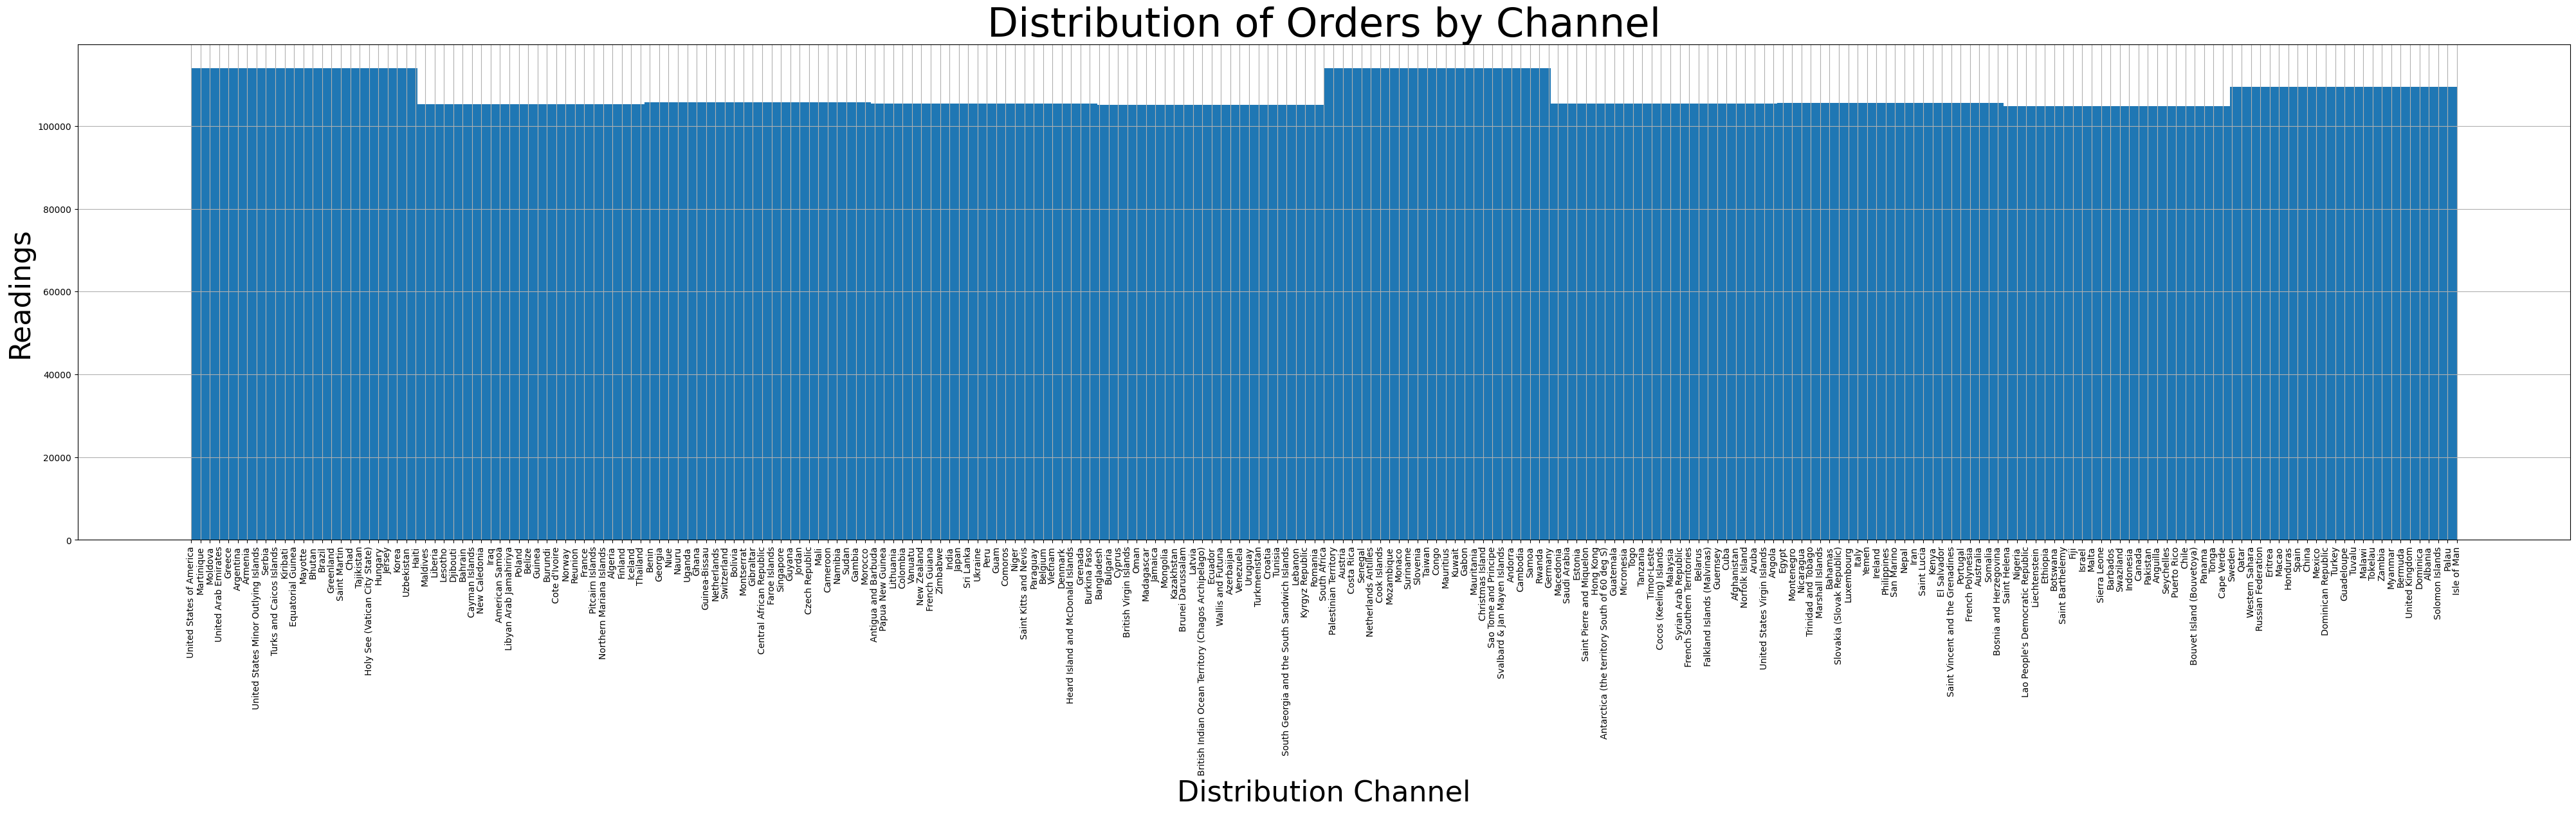

In [26]:
#Normal
plt.subplots(figsize=(50,10))
plt.hist(df['DISTRIBUTION_CHANNEL'])
plt.xlabel('Distribution Channel', fontsize=32)
plt.ylabel('Readings', fontsize=32)
plt.title('Distribution of Orders by Channel', fontsize=45)
plt.xticks(rotation=90)
plt.grid()
plt.show()

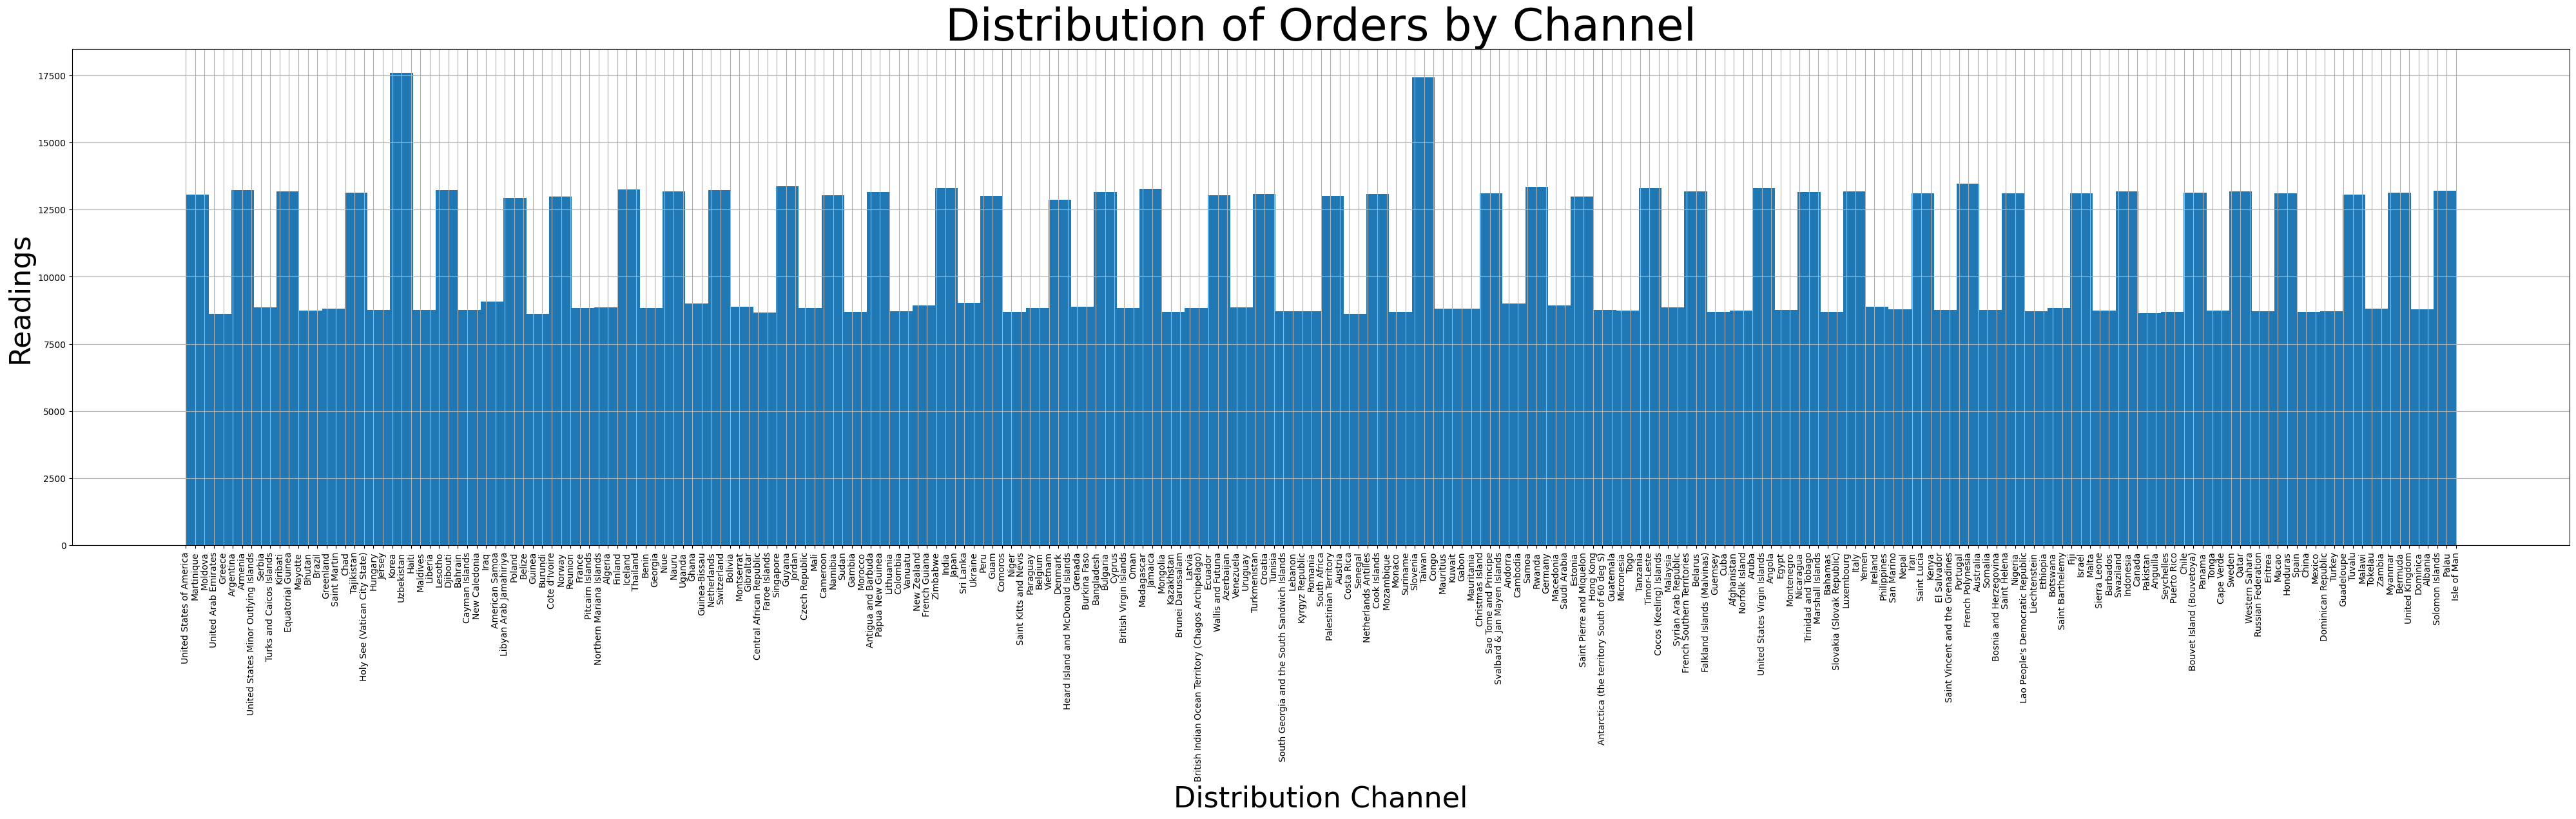

In [27]:
#Histogram when bins=100
plt.figure(figsize=(50, 10)) 
plt.hist(df['DISTRIBUTION_CHANNEL'], bins=100)
plt.xlabel('Distribution Channel', fontsize=32)
plt.ylabel('Readings', fontsize=32)
plt.title('Distribution of Orders by Channel', fontsize=50)
plt.xticks(rotation=90)
plt.grid()
plt.show()

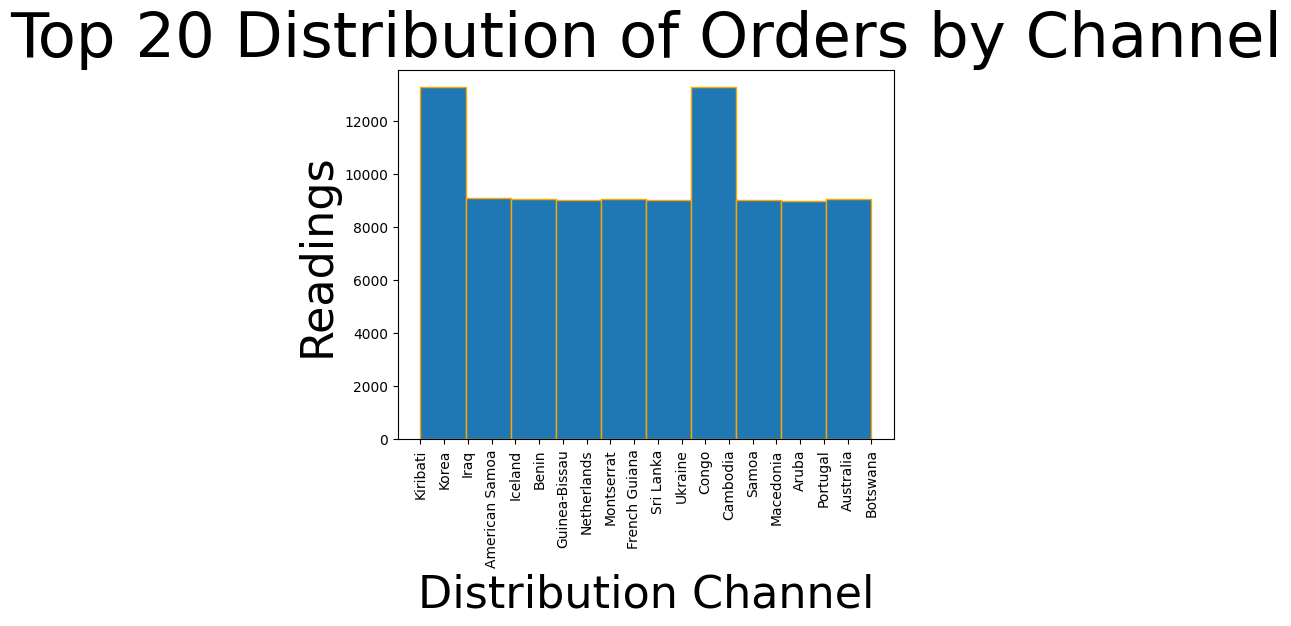

In [28]:
#Histogram of top 20 datas
count = df['DISTRIBUTION_CHANNEL'].value_counts()
top10 = count.head(20)
plt.hist(df[df['DISTRIBUTION_CHANNEL'].isin(top10.index)]['DISTRIBUTION_CHANNEL'], bins=10, edgecolor='orange')
plt.xlabel('Distribution Channel', fontsize=32)
plt.ylabel('Readings', fontsize=32)
plt.title('Top 20 Distribution of Orders by Channel', fontsize=45)
plt.xticks(rotation=90)
plt.show()

Create a Pie Chart on ORDER_CURRENCY
- To create a pie chart based on the 'ORDER_CURRENCY' column in a DataFrame, you can use the pie() function from the matplotlib.pyplot library.
This pie chart depicts the distribution of order currency in the given dataset.
-  The code first calculates the value counts of each unique currency using the pandas function 'value_counts()'. Then, it groups the values that appear less than 5% of the time into an "Other" category to make the chart more readable.
- Each slice of the pie represents a unique currency, and its size corresponds to the percentage of total orders with that currency
- The autopct parameter formats the percentage values displayed on each slice.

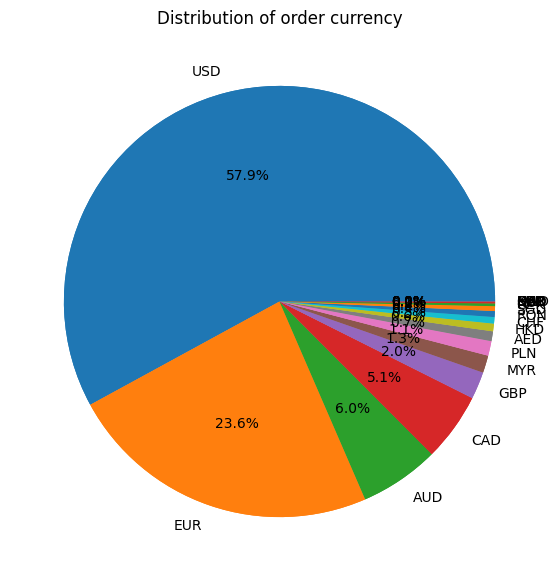

In [29]:
plt.figure(figsize=(7, 7))
pi = df['ORDER_CURRENCY'].value_counts()
plt.title('Distribution of order currency')
plt.pie(pi)
plt.pie(pi, labels=pi.index, autopct='%1.1f%%')
plt.show()

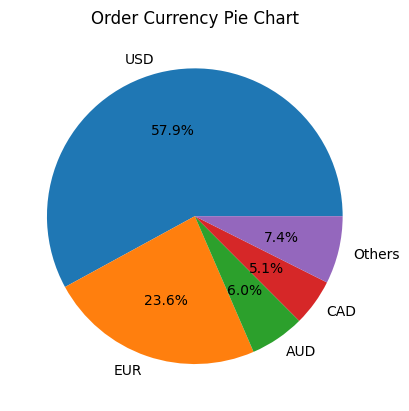

In [30]:
# Get value counts for ORDER_CURRENCY column
currency_count = df['ORDER_CURRENCY'].value_counts()

# Group values that appear less than 5% of the time into "Other" category
threshold = 0.05
# Filtering out the the values that are less than 5% 
small_values = currency_count[currency_count < threshold * currency_count.sum()]
# Grouping the filtered values in 'Others' category
currency_count['Others'] = small_values.sum()
currency_count.drop(index=small_values.index, inplace=True)

# Create pie chart
plt.pie(currency_count.values, labels=currency_count.index, autopct='%1.1f%%')
plt.title('Order Currency Pie Chart')

# Display chart
plt.show()

Create a line chart PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL
- line charts are used to visualize various aspects of the model's performance or the relationship between variables.

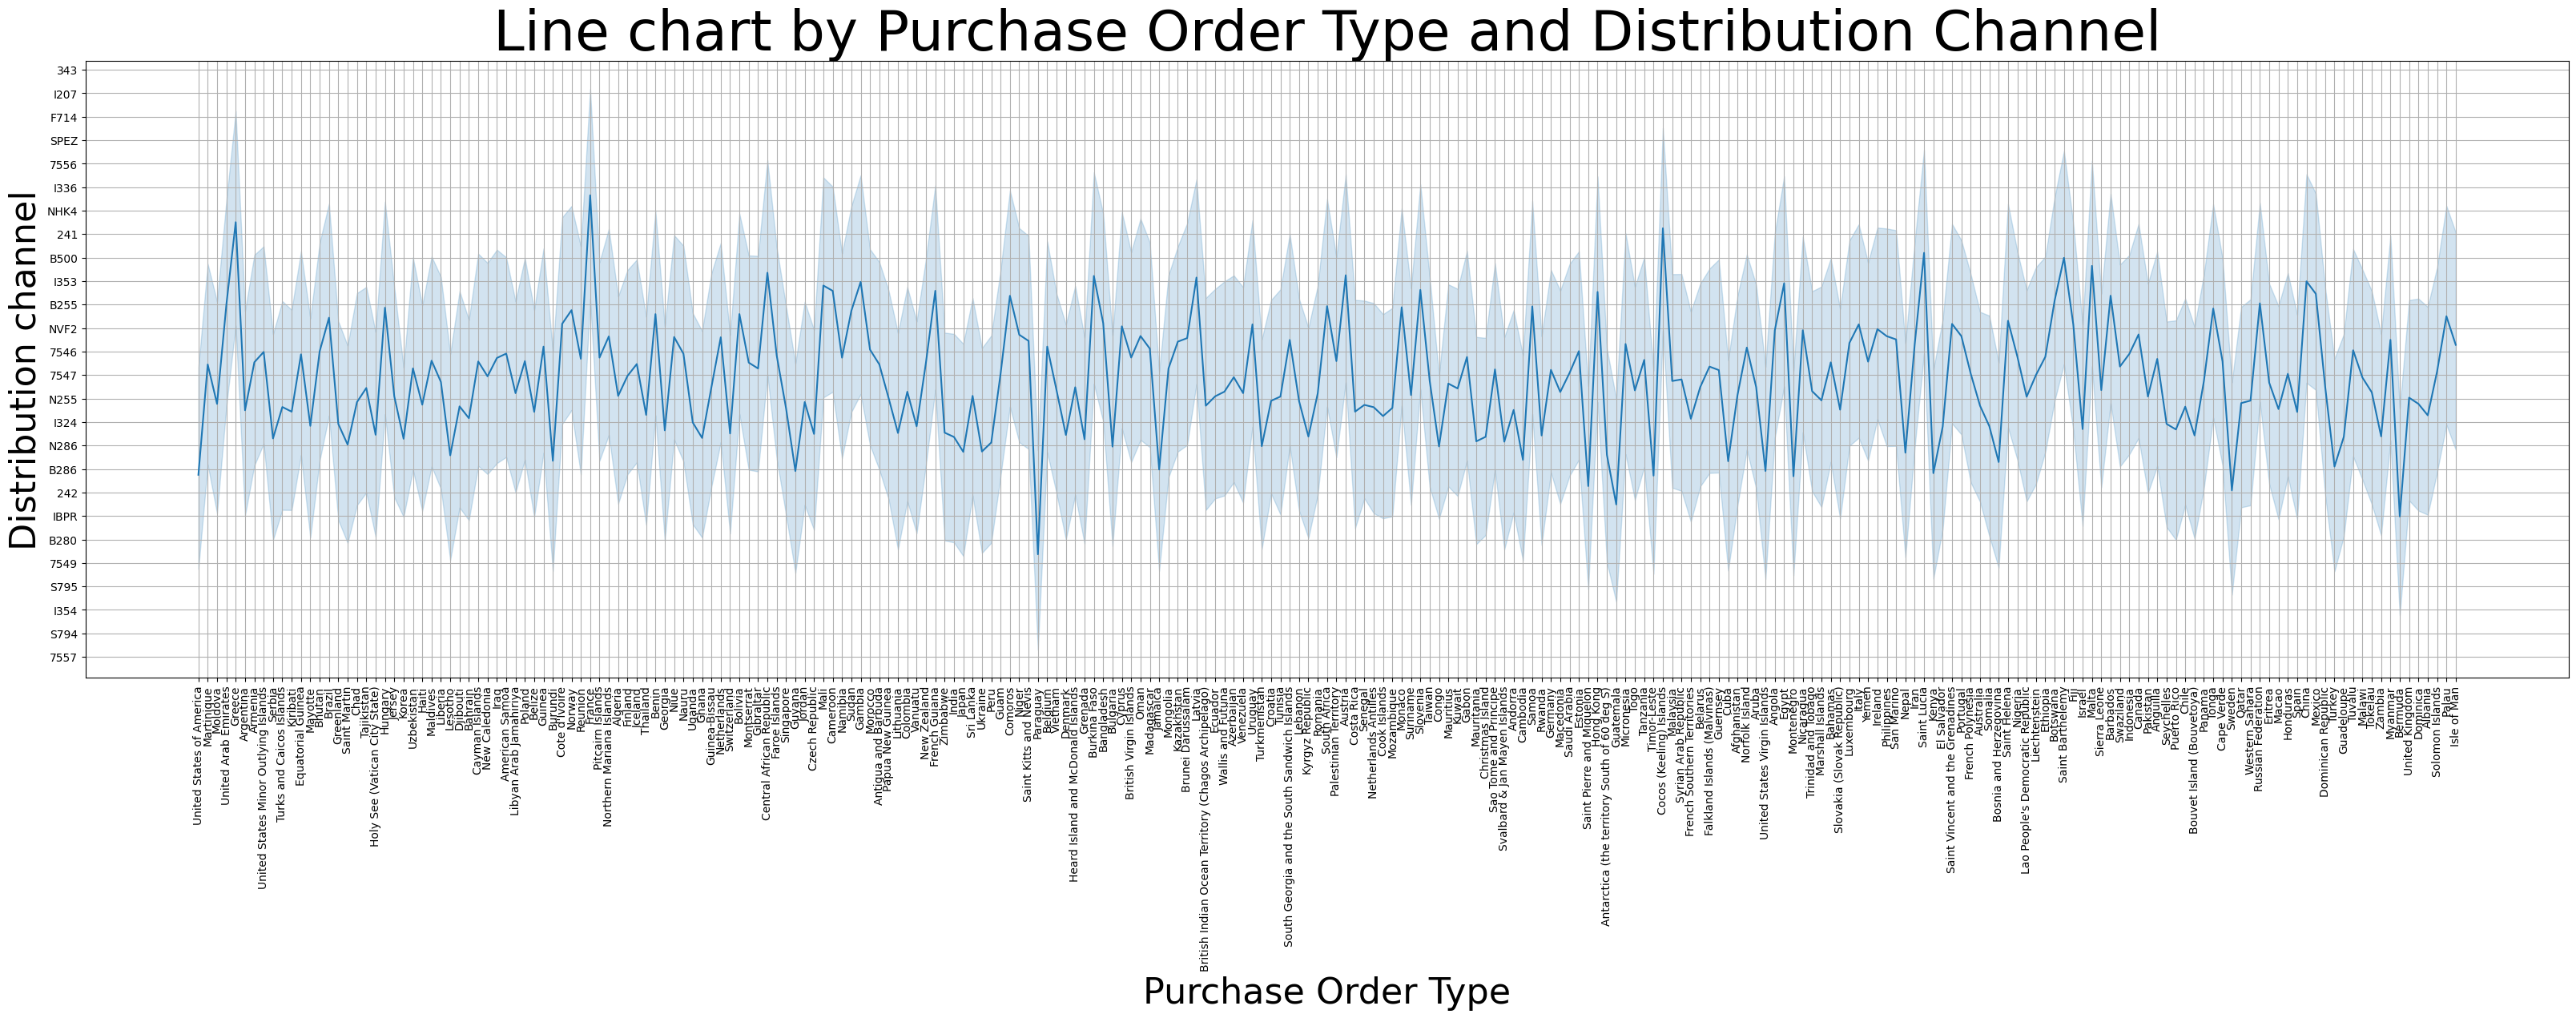

In [31]:
plt.subplots(figsize=(40,10))
sns.lineplot(x=df['DISTRIBUTION_CHANNEL'], y=df['PURCHASE_ORDER_TYPE'], data=df)
plt.xlabel('Purchase Order Type', fontsize = 32)
plt.ylabel('Distribution channel', fontsize = 32)
plt.title('Line chart by Purchase Order Type and Distribution Channel', fontsize = 50)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

Create a line plot on ORDER_CREATION_DATE and amount_in_usd
- This line plot provides a broad overview of the relationship between order creation date and amount in USD. It can help businesses identify trends and patterns in the data and inform decision-making around inventory management, pricing, and marketing strategies.

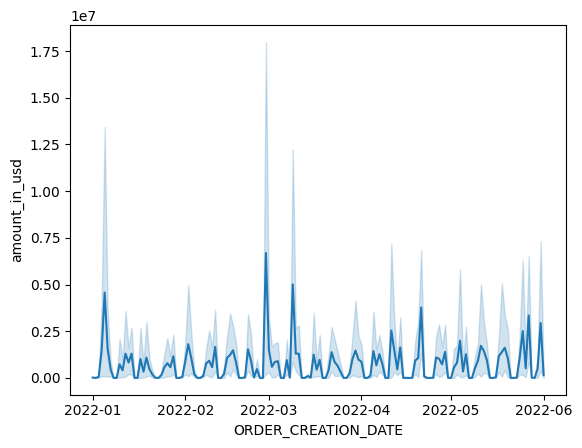

In [32]:
sns.lineplot(x=df['ORDER_CREATION_DATE'], y=df['amount_in_usd'],data=df)
plt.show()


Create a boxplot on ORDER_AMOUNT	to find out the outliers
 - This box plot provides an overview of the typical range of order amounts in USD and highlights any potential outliers or skewness in the data

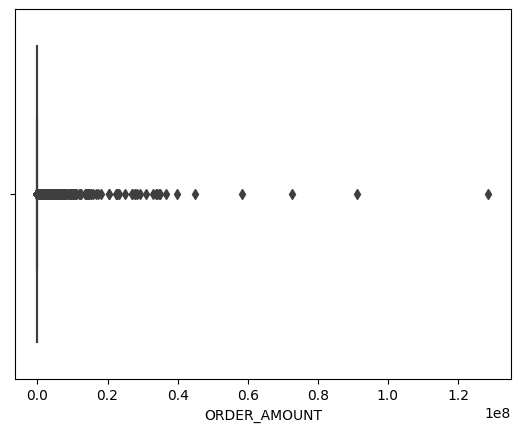

In [33]:
sns.boxplot(x=df['ORDER_AMOUNT'], data=df)
plt.show()

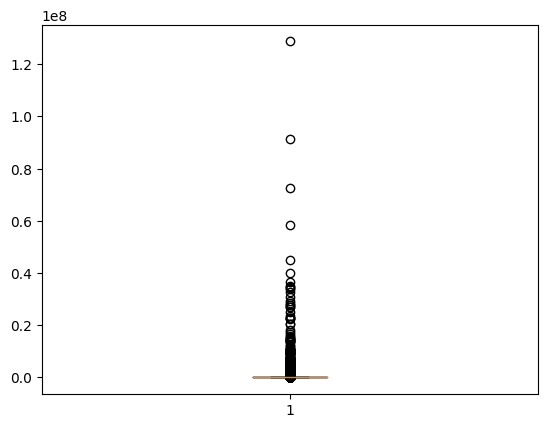

In [34]:
plt.boxplot(df['ORDER_AMOUNT'])
plt.show()

Create a barchart on COMPANY_CODE	 and ORDER_AMOUNT
- This chart can be useful in identifying high-value customers and setting sales targets for different sales regions or product lines
- Overall, it displays the highest order amounts made by each company.

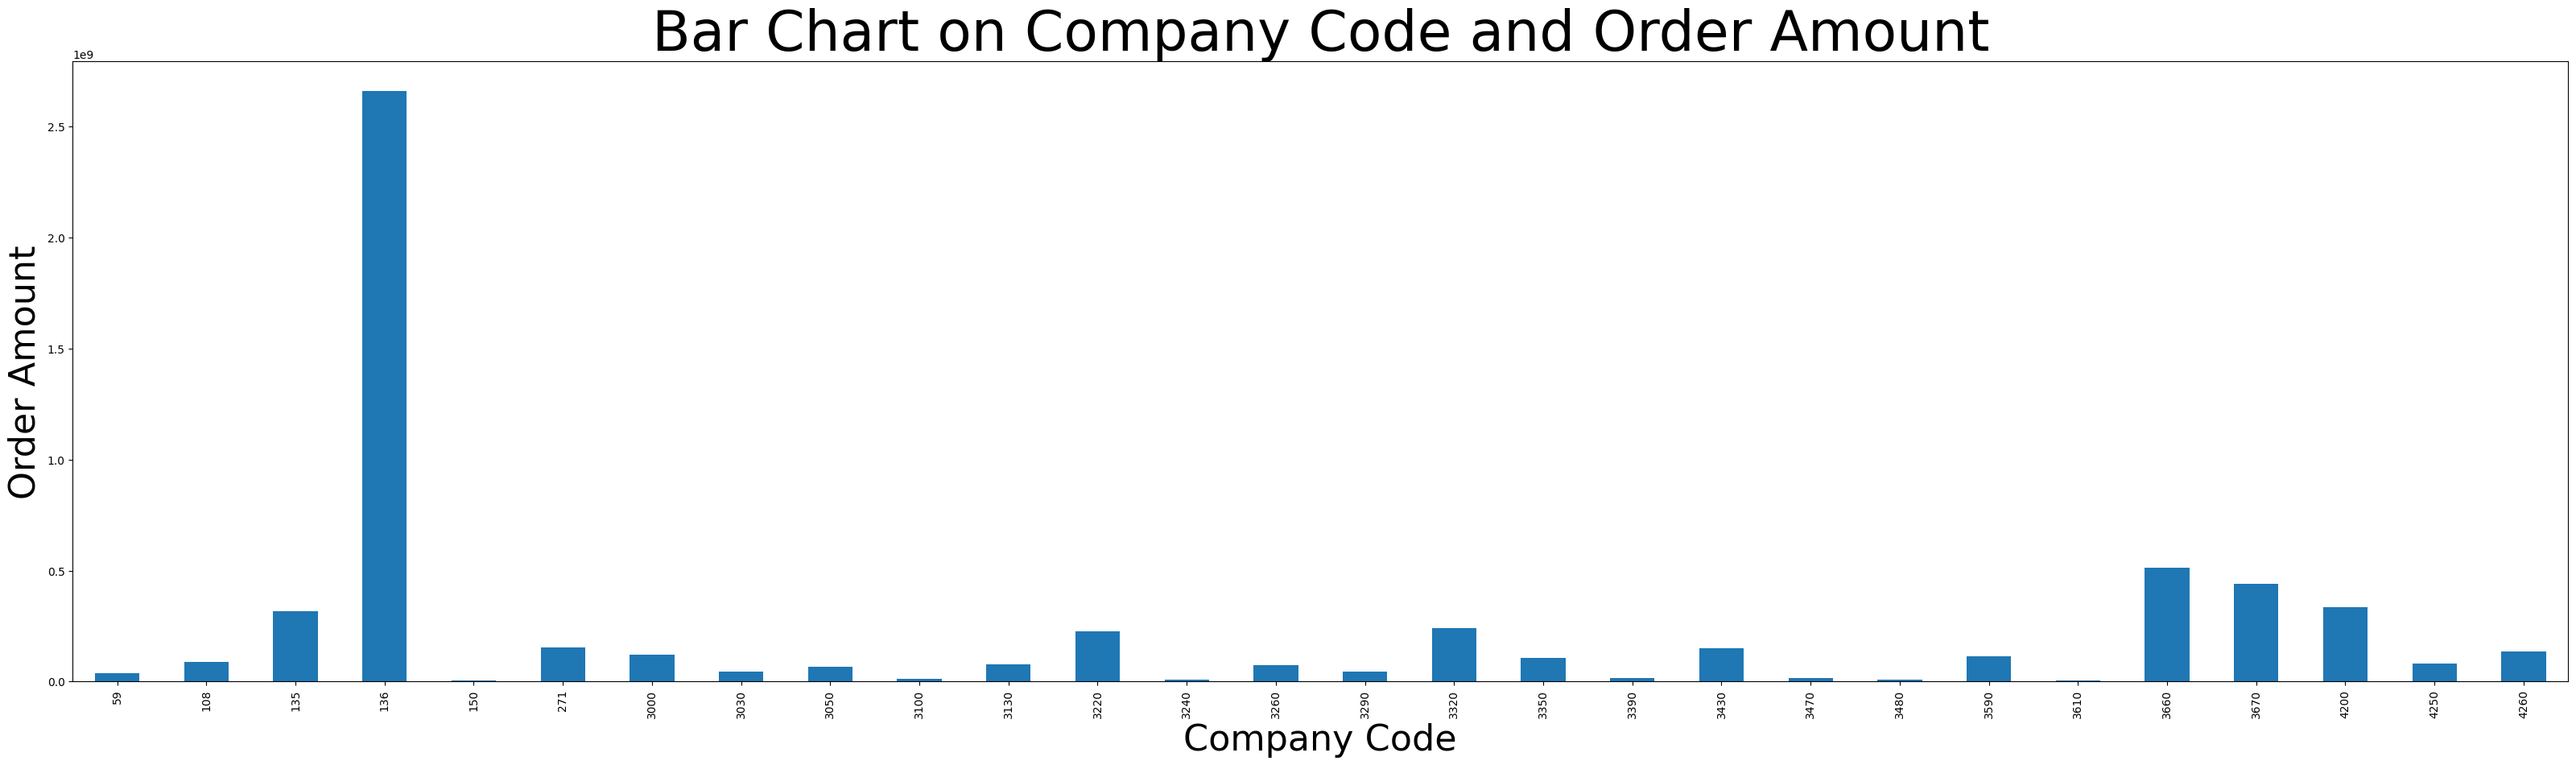

In [35]:
plt.subplots(figsize=(40,10))
df.groupby('COMPANY_CODE')['ORDER_AMOUNT'].sum().plot(kind='bar')
plt.xlabel('Company Code', fontsize = 32)
plt.ylabel('Order Amount', fontsize = 32)
plt.title('Bar Chart on Company Code and Order Amount', fontsize = 50)
plt.show()

# MILESTONE : 03 --> FEATURE ENGINEERING & SELECTION

In [36]:
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

Check for the outliers in the “amount_in_usd” column and replace the outliers with appropriate values, discussed in the sessions.

WHY MEDIAN?
 - We could not use Mode as the number of zeros's was in highest freaquncy
 - we could not use mean as it is sensitive to extreme values
 - Median should best represent the data

In [37]:
Q1 = df['amount_in_usd'].quantile(0.25)
Q3 = df['amount_in_usd'].quantile(0.75) 
IQR = Q3 - Q1 
print(IQR)
lower = Q1 - 1.5 * IQR 
upper = Q3 + 1.5 * IQR 
print(lower)
print(upper)

854.8000000000001
-1266.8
2152.4


In [38]:
outliers = df[(df['amount_in_usd'] < lower) | (df['amount_in_usd'] > upper)]
replace = df['amount_in_usd'].median() 
df.loc[outliers.index, 'amount_in_usd'] = replace
print("Replaced outliers:")
print(outliers)
print("Updated DataFrame:- ")
print(df)

Replaced outliers:
         CUSTOMER_ORDER_ID  SALES_ORG      DISTRIBUTION_CHANNEL      DIVISION  \
2                971991639       3238                   Moldova  South-Region   
8                821659852       2470  United States of America  South-Region   
34               811385935       4071             New Caledonia  South-Region   
59               761953719       3252                   Georgia  South-Region   
68               785805294       2182                  Djibouti  North-Region   
...                    ...        ...                       ...           ...   
1101916          856103636       2832             Guinea-Bissau  North-Region   
1101917          783964407       4054                 Swaziland  North-Region   
1101918          816646672       3734                 Argentina  North-Region   
1101920          853605710       2498                   Germany  South-Region   
1101924          921701000       2968                 Nicaragua  South-Region   

        

Label encoding or One hot Encoding on all the categorical columns 

WHY NOT ONE HOT ENCODING?
- As the total unique values are in the column are 8 only so we use label encodinh 

In [39]:
categorical = ['DISTRIBUTION_CHANNEL', 'DIVISION', 'PURCHASE_ORDER_TYPE', 'CREDIT_CONTROL_AREA',
               'ORDER_CURRENCY','COMPANY_CODE']
label = LabelEncoder()
for c in categorical:
    df[c] = label.fit_transform(df[c])
print(df)

         CUSTOMER_ORDER_ID  SALES_ORG  DISTRIBUTION_CHANNEL  DIVISION  \
0                946851639       3537                   232         1   
1                963432061       3449                   135         1   
2                971991639       3238                   141         1   
3                754349803       3911                   228         1   
4                930253442       2381                    82         1   
...                    ...        ...                   ...       ...   
1101920          853605710       2498                    79         1   
1101921          998890898       4509                    10         1   
1101922          983330221       3951                   151         1   
1101923          926668029       3235                   167         1   
1101924          921701000       2968                   156         1   

        RELEASED_CREDIT_VALUE  PURCHASE_ORDER_TYPE  COMPANY_CODE  \
0                        0,00                    0     

Log Transformations on continuous columns


LOG TRANSFORMATION 
- chose only 2 categorical variables, as the rest of the categorical variables as less than 10 unique values

In [40]:
df['ORDER_AMOUNT'] = np.log1p(df['ORDER_AMOUNT'])
df['amount_in_usd'] = np.log1p(df['amount_in_usd'])
print(df['ORDER_AMOUNT'],df['amount_in_usd'])

0           6.862350
1           6.669955
2          11.119801
3           7.248888
4           0.000000
             ...    
1101920     8.393033
1101921     0.000000
1101922     0.000000
1101923     0.000000
1101924     8.393033
Name: ORDER_AMOUNT, Length: 1074783, dtype: float64 0          6.791488
1          6.599109
2          5.698767
3          7.178002
4          0.000000
             ...   
1101920    5.698767
1101921    0.000000
1101922    0.000000
1101923    0.000000
1101924    5.698767
Name: amount_in_usd, Length: 1074783, dtype: float64


CONVERTING THE UNIQUE_CUST_ID TO INTEGER FORMAT
- because previously it was in string format

In [41]:
df['UNIQUE_CUST_ID'] = df['UNIQUE_CUST_ID'].astype(np.int64)

Try to extract new features by grouping existing columns

In [42]:
grouped_df = df.groupby('SALES_ORG').agg({
    'ORDER_AMOUNT': ['mean'],
    'RELEASED_CREDIT_VALUE': ['sum'],
    'CUSTOMER_NUMBER': ['nunique'],
    'amount_in_usd': ['max']
}).reset_index()
grouped_df.columns = ['SALES_ORG', 'avg_order_amount', 'total_credit_value', 'unique_customers', 'max_amount_usd']
grouped_df

,SALES_ORG,avg_order_amount,total_credit_value,unique_customers,max_amount_usd
0,2100,4.495421,"0,000,000,00139707,530,000,000,000,000,000,000...",141,7.657854
1,2101,4.764598,"0,000,000,000,001433,480,000,000,000,000,000,0...",129,7.644218
2,2102,4.760109,"0,000,000,000,000,000,001129,730,00257,730,000...",116,7.667664
3,2103,4.693573,"0,000,000,000,000,000,000,000,000,000,000,000,...",124,7.662659
4,2104,4.564189,"0,000,000,000,000,00963,100,000,000,000,00156,...",137,7.659321
...,...,...,...,...,...
2406,4506,4.887688,"0,000,001205,460,000,000,000,00227,280,000,000...",143,7.595945
2407,4507,4.784492,"2898,260,000,000,000,000,000,000,000,000,000,0...",122,7.650531
2408,4508,4.789962,"87582,530,000,00819,290,00674,910,000,000,000,...",139,7.644441
2409,4509,4.757516,"0,000,000,000,000,000,000,000,000,000,000,000,...",146,7.647061


Create a heatmap to find correlation between the columns

C:\Users\shash\AppData\Local\Temp\ipykernel_7524\857999246.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


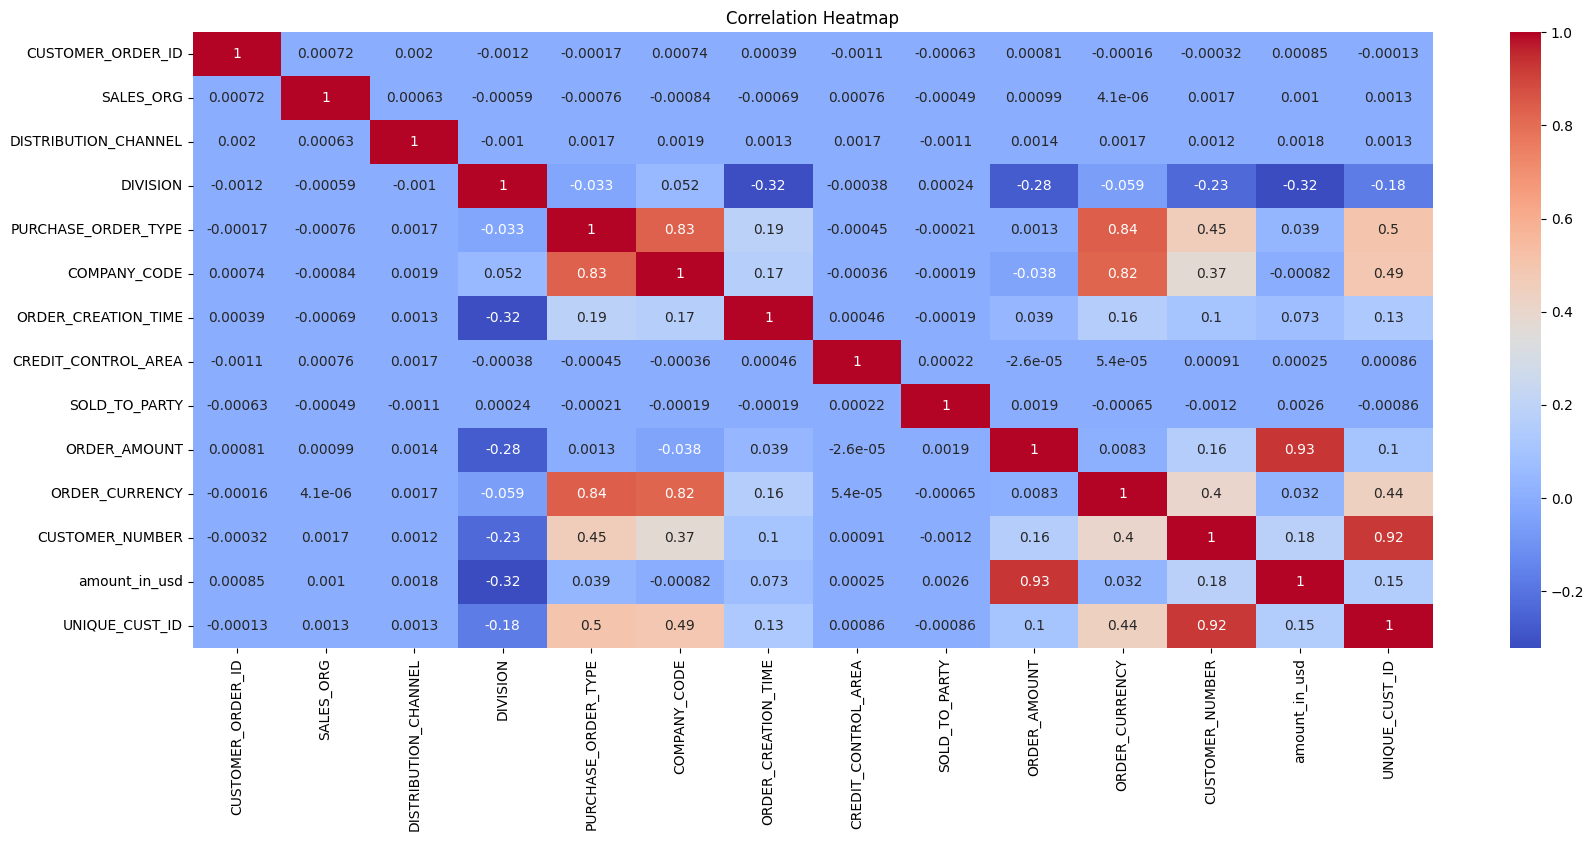

In [43]:
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Try to identify important or relevant columns for feature extraction

In [44]:
correlation_matrix = df.corr().abs()
high_var = np.where(correlation_matrix > 0.7)
high_var = [(correlation_matrix.columns[x], correlation_matrix.columns[y]) 
                 for x, y in zip(*high_var) if x != y and x < y]
print(high_var)

C:\Users\shash\AppData\Local\Temp\ipykernel_7524\1836903203.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().abs()


[('PURCHASE_ORDER_TYPE', 'COMPANY_CODE'), ('PURCHASE_ORDER_TYPE', 'ORDER_CURRENCY'), ('COMPANY_CODE', 'ORDER_CURRENCY'), ('ORDER_AMOUNT', 'amount_in_usd'), ('CUSTOMER_NUMBER', 'UNIQUE_CUST_ID')]


# MILESTONE : 04 --> ML MODELS & EVALUATIONS

Modify the dataset to pass into any type of machine learning models.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [46]:
df['RELEASED_CREDIT_VALUE'] = df['RELEASED_CREDIT_VALUE'].str.replace(',', '')
df['RELEASED_CREDIT_VALUE'] = df['RELEASED_CREDIT_VALUE'].replace('-', '', regex=True)
df['RELEASED_CREDIT_VALUE'] = df['RELEASED_CREDIT_VALUE'].astype('float')

In [47]:
X = df.drop(columns=['ORDER_CREATION_DATE','REQUESTED_DELIVERY_DATE','ORDER_AMOUNT',
                     'CREDIT_STATUS', 'amount_in_usd', 'UNIQUE_CUST_ID'],axis=1)

In [48]:
y=df['amount_in_usd']

In [49]:
df.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,UNIQUE_CUST_ID
0,946851639,3537,232,1,0.0,0,11,2022-01-01,43012,5,756141537,6.862350,2022-01-13,6,NaN,12311807,6.791488,123118073220
1,963432061,3449,135,1,0.0,0,11,2022-01-01,43114,2,798847812,6.669955,2022-01-11,6,NaN,12311807,6.599109,123118073220
2,971991639,3238,141,1,8234202.0,204,13,2022-01-01,110019,0,960984659,11.119801,2022-01-12,6,93.0,12118758,5.698767,121187583260
3,754349803,3911,228,1,147124.0,255,14,2022-01-01,153013,5,925857642,7.248888,2022-01-06,6,93.0,1210499770,7.178002,12104997703290
4,930253442,2381,82,1,0.0,255,14,2022-01-01,160020,4,947942786,0.000000,2022-01-06,6,64.0,1210351400,0.000000,12103514003290


In [50]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [52]:
feature_sel_model.get_support()

array([False, False,  True,  True, False,  True,  True, False, False,
       False,  True, False])

In [53]:
#total number of features and number of selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
selected_feat

total features: 12
selected features: 5


Index(['DISTRIBUTION_CHANNEL', 'DIVISION', 'PURCHASE_ORDER_TYPE',
       'COMPANY_CODE', 'ORDER_CURRENCY'],
      dtype='object')

In [54]:
X_train=X_train[selected_feat]
X_train

,DISTRIBUTION_CHANNEL,DIVISION,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CURRENCY
310281,172,0,343,23,19
294670,147,1,51,11,6
483286,25,1,344,24,19
986346,211,0,343,23,19
738850,216,0,343,23,19
...,...,...,...,...,...
110439,42,0,104,11,6
259644,173,0,104,4,6
132227,145,0,104,2,5
680622,3,0,343,23,19


In [55]:
X_test=X_test[selected_feat]
X_test

,DISTRIBUTION_CHANNEL,DIVISION,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CURRENCY
339059,77,0,343,23,19
991834,172,1,344,24,19
969163,19,0,343,23,19
603799,19,1,344,24,19
1082462,10,0,104,6,1
...,...,...,...,...,...
734111,54,0,343,23,19
96660,48,0,104,15,13
108321,56,1,176,10,6
35826,157,0,104,4,6


Try different machine learning models like - 
- Linear Regression
- Support Vector Machine 
- Decision Tree
- Random Forest 
- AdaBoost
- Xgboost etc.

Perform Regression model evaluations like MSE, RMSE, R-Square etc.

Compare the accuracies of all the models.

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost as xgb
from tqdm import tqdm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

IMPLEMENTING LINEAR REGRESSION
- USING THE LinearRegression module fro sklearn library

In [57]:
#initializing dictionaries to capture the R square value of every model that we have Implemented 
model_names = []
r_squared_values = []

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Initialize and train the regression models
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
# Make predictions on the test data
linear_regression_pred = linear_regression.predict(X_test)
# Evaluate the models
lr_mse = mean_squared_error(y_test, linear_regression_pred)
lr_rmse = mean_squared_error(y_test, linear_regression_pred, squared=False)
lr_mae = mean_absolute_error(y_test, linear_regression_pred)
lr_r2 = r2_score(y_test, linear_regression_pred)
model_names.append('LINEAR REG')
r_squared_values.append(lr_r2)

print("Linear Regression:")
print("MSE:",lr_mse)
print("RMSE:", lr_rmse)
print("MAE:", lr_mae)
print("R-Squared:",lr_r2)



Linear Regression:
MSE: 6.0165806995844076
RMSE: 2.4528719288997554
MAE: 2.043058760856914
R-Squared: 0.10693604902252807


IMPLEMENTING DESCISION TREES

In [59]:
from sklearn.tree import DecisionTreeRegressor
# Initialize and train the  models
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
# Make predictions on the test data
decision_tree_pred = decision_tree.predict(X_test)
# Evaluate the models
dt_mse = mean_squared_error(y_test, decision_tree_pred)
dt_rmse = mean_squared_error(y_test, decision_tree_pred, squared=False)
dt_mae = mean_absolute_error(y_test, decision_tree_pred)
dt_r2 = r2_score(y_test, decision_tree_pred)
model_names.append('DESCISION TREE')
r_squared_values.append(dt_r2)

print("Decision Tree:")
print("MSE:", dt_mse)
print("RMSE:", dt_rmse)
print("MAE:", dt_mae)
print("R-Squared:", dt_r2)
print()

Decision Tree:
MSE: 5.2032492036715885
RMSE: 2.2810631739764657
MAE: 1.7473538732251481
R-Squared: 0.22766193561198111



IMPLEMENTING RANDOM FOREST

In [60]:
from sklearn.ensemble import RandomForestRegressor
# Initialize and train the models
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
# Make predictions on the test data
random_forest_pred = random_forest.predict(X_test)
# Evaluate the models
rf_mse = mean_squared_error(y_test, random_forest_pred)
rf_rmse = mean_squared_error(y_test, random_forest_pred, squared=False)
rf_mae = mean_absolute_error(y_test, random_forest_pred)
rf_r2 = r2_score(y_test, random_forest_pred)
model_names.append('RANDOM FOREST')
r_squared_values.append(rf_r2)

print("random_forest:")
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print("MAE:", rf_mae)
print("R-Squared:", rf_r2)
print()

random_forest:
MSE: 5.135056647508273
RMSE: 2.2660663378436814
MAE: 1.7432802012140904
R-Squared: 0.23778401602198385



IMPLEMENTING ADABOOST

In [61]:
from sklearn.ensemble import AdaBoostRegressor
# Initialize and train the models
adaboost = AdaBoostRegressor()
adaboost.fit(X_train, y_train)
# Make predictions on the test data
adaboost_pred = adaboost.predict(X_test)
#evaluation
ada_mse = mean_squared_error(y_test, adaboost_pred)
ada_rmse = mean_squared_error(y_test, adaboost_pred, squared=False)
ada_mae = mean_absolute_error(y_test, adaboost_pred)
ada_r2 = r2_score(y_test, adaboost_pred)
model_names.append('ADABOOST')
r_squared_values.append(ada_r2)

print("adaboost :")
print("MSE:", ada_mse)
print("RMSE:",ada_rmse)
print("MAE:", ada_mae)
print("R-Squared:",ada_r2)
print()

adaboost :
MSE: 5.842380745216994
RMSE: 2.417101724217869
MAE: 2.0660311337041755
R-Squared: 0.13279321063563554



IMPLEMENTING XGboost

In [62]:
from xgboost import XGBRegressor
# Initialize and train the models
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
# Make predictions on the test data
xgb_pred = xgb_reg.predict(X_test)
#evaluate the model
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_rmse = mean_squared_error(y_test, xgb_pred, squared=False)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
model_names.append('XGboost')
r_squared_values.append(xgb_r2)

print("XGBoost:")
print("MSE:", xgb_mse)
print("RMSE:", xgb_rmse)
print("MAE:", xgb_mae)
print("R-Squared:", xgb_r2)

XGBoost:
MSE: 5.000421773562901
RMSE: 2.236162286946746
MAE: 1.7306974627206075
R-Squared: 0.25776838230386767


POLTTING OF EVALUATION METRICS
- BY the plot we choose XGboost and tune its Hyperparameters

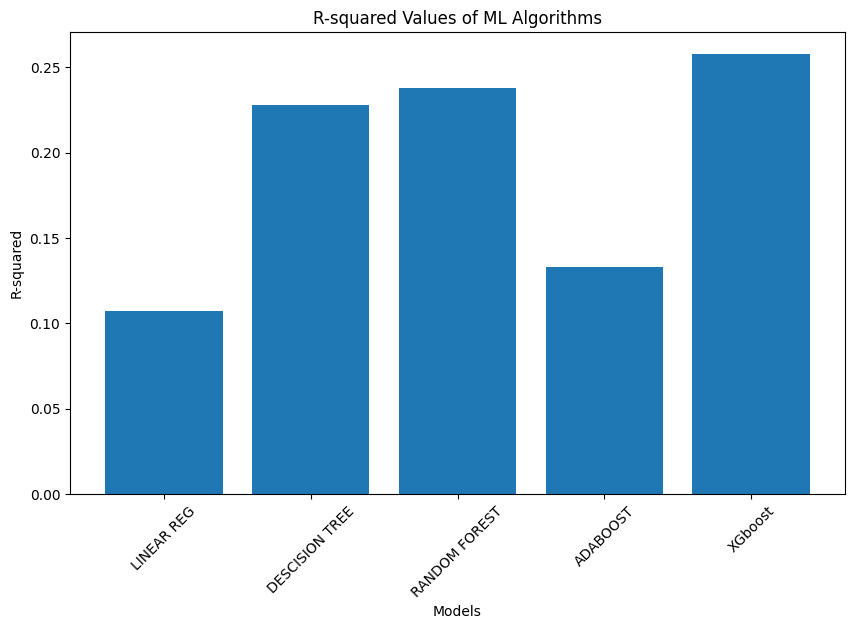

In [63]:

plt.figure(figsize=(10, 6))
plt.bar(model_names, r_squared_values)
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('R-squared Values of ML Algorithms')
plt.xticks(rotation=45)
plt.show()


HYPERPARAMETER TUNING
- WE MAKE THE TUNING OF THE XGBOOST AS IT IS SHOWING GREATER ACCURACY AMONG OTHER ML MODELS

- We have selected RANDOMIZED SEARCH CV as the data is very huge and Gridsearch cv would have taken lot of time, also our machines would not support that much load

- AFTER TUNING R-Squared VALUE COMES OUT TO BE 50%,  WHICH IS RELEVANT FOR A TIME SERIES DATA

In [64]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for randomized search
xgb_params = {
    'booster': ['gbtree'],
    'objective': ['reg:squarederror'],
    'eta': [0.1, 0.3, 0.5],
    'gamma': [0, 0.1, 0.2],
    'max_depth': [4, 6, 8],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'lambda': [0.1, 1.0, 10.0],
    'alpha': [0, 0.1, 0.5],
    'tree_method': ['auto', 'exact', 'approx'],
    'n_jobs': [-1],
    'random_state': [0]
}


# Create the RandomizedSearchCV object
xgb_random = RandomizedSearchCV(estimator=XGBRegressor(), param_distributions=xgb_params, scoring='neg_mean_squared_error', n_iter=10, cv=5, random_state=42)

# Fit the randomized search on the training data
xgb_random.fit(X_train, y_train)

# Get the best estimator and make predictions on the test data
xgb_best = xgb_random.best_estimator_
xgb_pred_best = xgb_best.predict(X_test)

# Calculate evaluation metrics
xgb_mse_best = mean_squared_error(y_test, xgb_pred_best)
xgb_rmse_best = mean_squared_error(y_test, xgb_pred_best, squared=False)
xgb_mae_best = mean_absolute_error(y_test, xgb_pred_best)
xgb_r2_best = r2_score(y_test, xgb_pred_best)

# Print the evaluation metrics
print("XGBoost (Best Parameters):")
print("MSE:", xgb_mse_best)
print("RMSE:", xgb_rmse_best)
print("MAE:", xgb_mae_best)
print("R-Squared:", xgb_r2_best)

XGBoost (Best Parameters):
MSE: 4.999087272818701
RMSE: 2.235863876182694
MAE: 1.7317651546318544
R-Squared: 0.25796646732369966
